# Seção 04.03b - Aprendizagem Bayesiana (base censo) - Label encoder
Para esta seção, usarei a base de dados "census.csv" disponibilizada no curso do Professor Jones na UDEMY.

In [7]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler
                                   , LabelEncoder
                                   , OneHotEncoder)
from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
nomeDaBase = "../bases/census.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [23]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,39,50,38,53,28,37,49,52,31,42
workclass,State-gov,Self-emp-not-inc,Private,Private,Private,Private,Private,Self-emp-not-inc,Private,Private
final-weight,77516,83311,215646,234721,338409,284582,160187,209642,45781,159449
education,Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters,9th,HS-grad,Masters,Bachelors
education-num,13,13,9,7,13,14,5,9,14,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-spouse-absent,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial,Other-service,Exec-managerial,Prof-specialty,Exec-managerial
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife,Wife,Not-in-family,Husband,Not-in-family,Husband
race,White,White,White,Black,Black,White,Black,White,White,White
sex,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
final-weight      32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loos      32561 non-null int64
hour-per-week     32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
final-weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loos,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hour-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [24]:
dp.cardinalidade(df_tratado)

,Atributo,Cardinalidade,Valores
6,sex,2,"[1, 0]"
8,income,2,"[0, 1]"
5,race,5,"[4, 2, 1, 0, 3]"
4,relationship,6,"[1, 0, 5, 3, 4, 2]"
2,marital-status,7,"[4, 2, 0, 3, 5, 1, 6]"
0,workclass,9,"[7, 6, 4, 1, 2, 0, 5, 8, 3]"
3,occupation,15,"[1, 4, 6, 10, 8, 12, 3, 14, 5, 7, 13, 0, 11, 2, 9]"
1,education,16,"[9, 11, 1, 12, 6, 15, 7, 8, 5, 10, 14, 4, 0, 3, 13, 2]"
7,native-country,42,"[39, 5, 23, 19, 0, 26, 35, 33, 16, 9, 2, 11, 20, 30, 22, 31, 4, 1, 37, 7, 25, 36, 14, 32, 6, 8, 10, 13, 3, 24, 41, 29, 28, 34, 38, 12, 27, 40, 17, 21, 18, 15]"


In [11]:
df_obj = df.select_dtypes(exclude=["int64", "float64"])

df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

for atributo in df_obj.columns:
    if "?" in df[atributo].values:
        print(f"""O Atributo "{atributo}" tem {len(df[df[atributo]=="?"])} valores iguais a "?".""")
#     df_tratado[i].replace('?', np.nan, inplace=True)

O Atributo "workclass" tem 1836 valores iguais a "?".
O Atributo "occupation" tem 1843 valores iguais a "?".
O Atributo "native-country" tem 583 valores iguais a "?".


## Análise preliminar dos dados:

- Trata-se de uma base com 32561 registros, 14 atributos (sendo 6 nupericos e 8 categóricos) e 1 atributo alvo.
- À primeira vista, não há dados faltantes, porém, na análise da cardinalidade vemos um "?", e este símbolo foi considerado como valor faltante.
- 

### Próxima etapa:
1. Tratar os valores indicados como "?". **Alternativas de tratamento possíveis:**


> a. Deixar quieto e encarar o "?" como um valor válido;

> b. Remoção dos registros com "?";

> c. Usar a moda de cada atributo para substituir o "?"; ou

> d. Usar KNN para determinar qual o valor mais provável para o valor faltante.

#### a. Deixar quieto e encarar o "?" como um valor válido

In [26]:
# Copiando df original para um novo df (df_tratado).

df_tratado = df.copy()

label_encoder = LabelEncoder()

for atributo_categorico in df_obj.columns:
    df_tratado[atributo_categorico] = label_encoder.fit_transform(df_tratado[atributo_categorico])
    
df_tratado.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,39,50,38,53,28,37,49,52,31,42
workclass,7,6,4,4,4,4,4,6,4,4
final-weight,77516,83311,215646,234721,338409,284582,160187,209642,45781,159449
education,9,9,11,1,9,12,6,11,12,9
education-num,13,13,9,7,13,14,5,9,14,13
marital-status,4,2,0,2,2,2,3,2,4,2
occupation,1,4,6,6,10,4,8,4,10,4
relationship,1,0,1,0,5,5,1,0,1,0
race,4,4,4,2,2,4,2,4,4,4
sex,1,1,1,1,0,0,0,1,0,1


### Usando *train_test_split*  

In [18]:
x = df_tratado.iloc[:, 0:-1]
y = df_tratado.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Aplicando o escalonamento

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.



### Aplicando o modelo

In [20]:
from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()

classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

GaussianNB(priors=None, var_smoothing=1e-09)

### Verificando como o modelo se saiu

Métrica 1 (Acurácia): 0.8046.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6159
           1       0.70      0.35      0.46      1982

   micro avg       0.80      0.80      0.80      8141
   macro avg       0.76      0.65      0.67      8141
weighted avg       0.79      0.80      0.78      8141
.
Normalized confusion matrix
[[0.95210261 0.04789739]
 [0.65388496 0.34611504]]


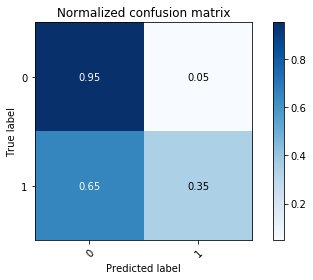

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Métrica 1 (Acurácia): {:.4f}.".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

## Observação:
O modelo está errando muito a classe 1, correspondente ao *income* > 50k. **Acredito que isso esteja ocorrendo devido ao desbalanceamento da base.**

### Testando reamostragem estratificada:

In [27]:
df_tratado.shape

(32561, 15)

In [28]:
x = df_tratado.iloc[:, 0:-1]
y = df_tratado.iloc[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.



In [41]:
stratified_kfold = StratifiedKFold(n_splits=4, random_state=0, shuffle=False)
i = 1

for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classificador = GaussianNB()

    classificador.fit(x_train, y_train)

    y_pred = classificador.predict(x_test)
    print(f"Fold número {i}")
    print("Métrica 1 (Acurácia): {:.3f}.".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
    print("Métrica 2 (Relatório de classificação):\n\n{}\n\n\n\n".format(classification_report(y_test, y_pred)))
    
    i += 1

Fold número 1
Métrica 1 (Acurácia): 0.801.
Métrica 2 (Relatório de classificação):

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6180
           1       0.68      0.33      0.45      1961

   micro avg       0.80      0.80      0.80      8141
   macro avg       0.75      0.64      0.66      8141
weighted avg       0.78      0.80      0.77      8141





Fold número 2
Métrica 1 (Acurácia): 0.802.
Métrica 2 (Relatório de classificação):

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6180
           1       0.68      0.33      0.45      1960

   micro avg       0.80      0.80      0.80      8140
   macro avg       0.75      0.64      0.66      8140
weighted avg       0.78      0.80      0.78      8140





Fold número 3
Métrica 1 (Acurácia): 0.802.
Métrica 2 (Relatório de classificação):

              precision    recall  f1-score   support

           0       0.82      0.

# Conclusão
Com Label Encoder e escalonando, as métricas de classificação ficaram melhores que com o OHE escalonado. Porém, a impressão é que o uso do naive Bayes para esse dataset não é a melhor escolha.